<a href="https://colab.research.google.com/github/jeonbyeongguk/cuckoobee/blob/main/Data%20Science/Machine%20Learning/_9_%EC%95%99%EC%83%81%EB%B8%94(Ensemble).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 앙상블(Ensemble)

* 일반화와 강건성(Robustness)을 향상시키기 위해 여러 모델의 예측 값을 결합하는 방법
* 앙상블에는 크게 두가지 종류가 존재
  * 평균 방법
    * 여러개의 추정값을 독립적으로 구한뒤 평균을 취함
    * 결합 추정값은 분산이 줄어들기 때문에 단일 추정값보다 좋은 성능을 보임
  * 부스팅 방법
    * 순차적으로 모델 생성
    * 결합된 모델의 편향을 감소 시키기 위해 노력
    * 부스팅 방법의 목표는 여러개의 약한 모델들을 결합해 하나의 강력한 앙상블 모델을 구축하는 것

## Bagging meta-estimator

* bagging은 bootstrap aggregating의 줄임말
* 원래 훈련 데이터셋의 일부를 사용해 여러 모델을 훈련
* 각각의 결과를 결합해 최종 결과를 생성
* 분산을 줄이고 과적합을 막음
* 강력하고 복잡한 모델에서 잘 동작

In [1]:
from sklearn.datasets import load_iris, load_wine, load_breast_cancer
from sklearn.datasets import load_boston, load_diabetes
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate

In [2]:
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [3]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor

### Bagging을 사용한 분류

#### 데이터셋 불러오기

In [4]:
iris = load_iris()
wine = load_wine()
cancer = load_breast_cancer()

#### KNN

##### 붓꽃 데이터

In [5]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [8]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.005559396743774414 (+/- 0.0036121976692747417)
avg score time: 0.004714298248291016 (+/- 0.002626484178914762)
avg test score: 0.96 (+/- 0.024944382578492935)


In [9]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.07303690910339355 (+/- 0.0328400421443287)
avg score time: 0.02455105781555176 (+/- 0.008467371896332915)
avg test score: 0.96 (+/- 0.024944382578492935)


##### 와인 데이터

In [18]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [14]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0020837306976318358 (+/- 0.0007599174940584126)
avg score time: 0.003157901763916016 (+/- 0.0010844577339762422)
avg test score: 0.9493650793650794 (+/- 0.037910929811115976)


In [15]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.02273221015930176 (+/- 0.0023664885956107967)
avg score time: 0.009002447128295898 (+/- 0.00059948408636181)
avg test score: 0.9607936507936508 (+/- 0.0417058772419794)


##### 유방암 데이터

In [17]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [19]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.005266904830932617 (+/- 0.003694104452488013)
avg score time: 0.021280288696289062 (+/- 0.009354960687520045)
avg test score: 0.9648501785437045 (+/- 0.009609970350036127)


In [21]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.024730539321899413 (+/- 0.002215301104199563)
avg score time: 0.01679086685180664 (+/- 0.0020895852866497687)
avg test score: 0.9613414066138798 (+/- 0.021188408593400723)


#### SVC

##### 붓꽃 데이터

In [28]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [29]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0020607471466064452 (+/- 0.0002613728676317125)
avg score time: 0.0006644725799560547 (+/- 8.889196205773263e-05)
avg test score: 0.9666666666666666 (+/- 0.02108185106778919)


In [30]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.03198451995849609 (+/- 0.003757486356684365)
avg score time: 0.00472416877746582 (+/- 0.0018057617410958589)
avg test score: 0.96 (+/- 0.03265986323710903)


##### 와인 데이터

In [31]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [ ]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0030254364013671876 (+/- 0.0008948659224917901)
avg score time: 0.0007365703582763672 (+/- 0.00015224780987523393)
avg test score: 0.9833333333333334 (+/- 0.022222222222222233)


In [32]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.032872772216796874 (+/- 0.001980554336239738)
avg score time: 0.0047947406768798825 (+/- 0.00031019602591723835)
avg test score: 0.9777777777777779 (+/- 0.020786985482077462)


##### 유방암 데이터

In [33]:
base_model = make_pipeline(
    StandardScaler(),
    SVC()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [34]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.007613134384155273 (+/- 0.0024726074963597948)
avg score time: 0.002164745330810547 (+/- 7.811468841444149e-05)
avg test score: 0.9736376339077782 (+/- 0.014678541667933545)


In [35]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.08606243133544922 (+/- 0.015328763091268427)
avg score time: 0.01936345100402832 (+/- 0.005567088599665304)
avg test score: 0.9613569321533924 (+/- 0.018865249100232472)


#### Decision Tree

##### 붓꽃 데이터

In [38]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [39]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0030665874481201174 (+/- 0.0012258641044528545)
avg score time: 0.0007278919219970703 (+/- 3.717220148223758e-05)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [40]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.02915983200073242 (+/- 0.0028569110146285247)
avg score time: 0.0028313636779785157 (+/- 0.00033264847106358604)
avg test score: 0.9399999999999998 (+/- 0.04898979485566355)


##### 와인 데이터

In [42]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [43]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.002100229263305664 (+/- 0.0003885807998140193)
avg score time: 0.0005741596221923828 (+/- 0.00015495053655144395)
avg test score: 0.8707936507936507 (+/- 0.04552374310946868)


In [44]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.026682615280151367 (+/- 0.00237962972672338)
avg score time: 0.002934837341308594 (+/- 0.000505706311430203)
avg test score: 0.9158730158730158 (+/- 0.03952667803704214)


##### 유방암 데이터

In [45]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeClassifier()
)
bagging_model = BaggingClassifier(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [46]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.009050321578979493 (+/- 0.0006203617965232679)
avg score time: 0.0007984638214111328 (+/- 5.8390068086692895e-05)
avg test score: 0.924375097034622 (+/- 0.022851220909829602)


In [47]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.042499971389770505 (+/- 0.002656960741421276)
avg score time: 0.0035209178924560545 (+/- 0.000313574488950955)
avg test score: 0.9455674584691819 (+/- 0.021711422048219537)


### Bagging을 사용한 회귀

#### 데이터셋 불러오기

In [49]:
boston = load_boston()
diabetes = load_diabetes()

#### KNN

##### 보스턴 주택 가격 데이터

In [50]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)


In [51]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.002785491943359375 (+/- 0.0005039671013469553)
avg score time: 0.0028881072998046876 (+/- 0.0002899114473339681)
avg test score: 0.47357748833823543 (+/- 0.13243123464477455)


In [52]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0795201301574707 (+/- 0.02563344553909418)
avg score time: 0.04716062545776367 (+/- 0.01759968754587959)
avg test score: 0.4656029540962156 (+/- 0.12666647298401174)


##### 당뇨병 데이터

In [53]:
base_model = make_pipeline(
    StandardScaler(),
    KNeighborsRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)


In [54]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0020551204681396483 (+/- 0.001039362659244969)
avg score time: 0.002016592025756836 (+/- 0.0006178561867631667)
avg test score: 0.3689720650295623 (+/- 0.044659049060165365)


In [55]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.023701858520507813 (+/- 0.004428276643610838)
avg score time: 0.011187314987182617 (+/- 0.0027238798470326083)
avg test score: 0.3858551771610196 (+/- 0.06944968191360676)


#### SVR

##### 보스턴 주택 가격 데이터

In [74]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)


In [75]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.017332696914672853 (+/- 0.006964632607978621)
avg score time: 0.004010343551635742 (+/- 0.00018894985118167326)
avg test score: 0.17631266230186618 (+/- 0.5224914915128981)


In [76]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.05526237487792969 (+/- 0.0031819769644803584)
avg score time: 0.0166196346282959 (+/- 0.0020079131042493293)
avg test score: 0.0448791535028014 (+/- 0.3673054711421946)


##### 당뇨병 데이터

In [60]:
base_model = make_pipeline(
    StandardScaler(),
    SVR()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [61]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.01416168212890625 (+/- 0.004443881194589038)
avg score time: 0.003594827651977539 (+/- 0.0009559586870024556)
avg test score: 0.14659936199629434 (+/- 0.02190798003342928)


In [ ]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.042175579071044925 (+/- 0.006007041635110622)
avg score time: 0.007076787948608399 (+/- 0.0005758847346321918)
avg test score: 0.05950392521980994 (+/- 0.040345997608972006)


#### Decision Tree

##### 보스턴 주택 가격 데이터

In [79]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [80]:
#base_model
cross_val = cross_validate(
    estimator=base_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.006848335266113281 (+/- 0.00023004514385672515)
avg score time: 0.0012610435485839843 (+/- 0.00012260923408611687)
avg test score: 0.11871659055546849 (+/- 0.7978525429801896)


In [81]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.03737235069274902 (+/- 0.004332121917975542)
avg score time: 0.0034775733947753906 (+/- 0.0007246148211681872)
avg test score: 0.5290206826302073 (+/- 0.13741866965268923)


##### 당뇨병 데이터

In [82]:
base_model = make_pipeline(
    StandardScaler(),
    DecisionTreeRegressor()
)
bagging_model = BaggingRegressor(base_model, n_estimators=10, max_samples=0.5, max_features=0.5)

In [83]:
# base_model
cross_val = cross_validate(
    estimator=base_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.0066831111907958984 (+/- 0.0021756542790250747)
avg score time: 0.0010262012481689453 (+/- 7.007890631884452e-05)
avg test score: -0.11129570497922718 (+/- 0.13145203747826634)


In [84]:
# bagging_model
cross_val = cross_validate(
    estimator=bagging_model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.030981016159057618 (+/- 0.0041195012803470765)
avg score time: 0.0027410507202148436 (+/- 8.752467812647283e-05)
avg test score: 0.3877986122487829 (+/- 0.08822764795009845)


## Forests of randomized trees

* `sklearn.ensemble` 모듈에는 무작위 결정 트리를 기반으로하는 두 개의 평균화 알고리즘이 존재
  * Random Forest
  * Extra-Trees
* 모델 구성에 임의성을 추가해 다양한 모델 집합이 생성
* 앙상블 모델의 예측은 각 모델의 평균

In [85]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor

### Random Forests 분류

In [86]:
model = make_pipeline(
    StandardScaler(),
    RandomForestClassifier()
)

In [88]:
# iris
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.3973207950592041 (+/- 0.23398525392931604)
avg score time: 0.01961226463317871 (+/- 0.00119089389012405)
avg test score: 0.9666666666666668 (+/- 0.02108185106778919)


In [89]:
# wine
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.2566093444824219 (+/- 0.02596487858224755)
avg score time: 0.020232248306274413 (+/- 0.0017369089006254506)
avg test score: 0.9552380952380952 (+/- 0.013219468453115573)


In [90]:
# cancer
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.41550240516662595 (+/- 0.06220240602908326)
avg score time: 0.02605133056640625 (+/- 0.010877695551710023)
avg test score: 0.9613569321533924 (+/- 0.01623457791867057)


### Random Forests 회귀

In [94]:
model = make_pipeline(
    StandardScaler(),
    RandomForestRegressor()
)

In [95]:
# boston
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.5260613918304443 (+/- 0.03693107799733487)
avg score time: 0.015460538864135741 (+/- 0.001685327624714818)
avg test score: 0.6103590009647113 (+/- 0.22425286921358017)


In [96]:
# diabetes
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.35573520660400393 (+/- 0.0910205550403676)
avg score time: 0.012741279602050782 (+/- 0.003328238309221587)
avg test score: 0.41542964700429297 (+/- 0.054142693821609904)


### Extremely Randomized Trees 분류

In [98]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesClassifier()
)

In [99]:
# iris
cross_val = cross_validate(
    estimator=model,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.09888653755187989 (+/- 0.008704262878669072)
avg score time: 0.01101512908935547 (+/- 0.0004646333273885461)
avg test score: 0.9533333333333334 (+/- 0.03399346342395189)


In [100]:
# wine
cross_val = cross_validate(
    estimator=model,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10375046730041504 (+/- 0.006454158306241587)
avg score time: 0.01116185188293457 (+/- 0.0005345513709502608)
avg test score: 0.9888888888888889 (+/- 0.013608276348795441)


In [101]:
# cancer
cross_val = cross_validate(
    estimator=model,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.1960463523864746 (+/- 0.007384133458671371)
avg score time: 0.02149953842163086 (+/- 0.0021357508508383517)
avg test score: 0.9683744760130415 (+/- 0.014235793790533947)


### Extremely Randomized Trees 회귀

In [102]:
model = make_pipeline(
    StandardScaler(),
    ExtraTreesRegressor()
)

In [103]:
# boston
cross_val = cross_validate(
    estimator=model,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.3029029846191406 (+/- 0.017311180758999976)
avg score time: 0.016139888763427736 (+/- 0.0010008756474763278)
avg test score: 0.6168023496957215 (+/- 0.27279360511758605)


In [104]:
# diabetes
cross_val = cross_validate(
    estimator=model,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/- {})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/- {})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/- {})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))


avg fit time: 0.1697981357574463 (+/- 0.0244073997016905)
avg score time: 0.010462522506713867 (+/- 0.00019315436711372263)
avg test score: 0.4504490251099013 (+/- 0.03736377051101075)


### Random Forest, Extra Tree 시각화

* 결정 트리, Random Forest, Extra Tree의 결정 경계와 회귀식 시각화

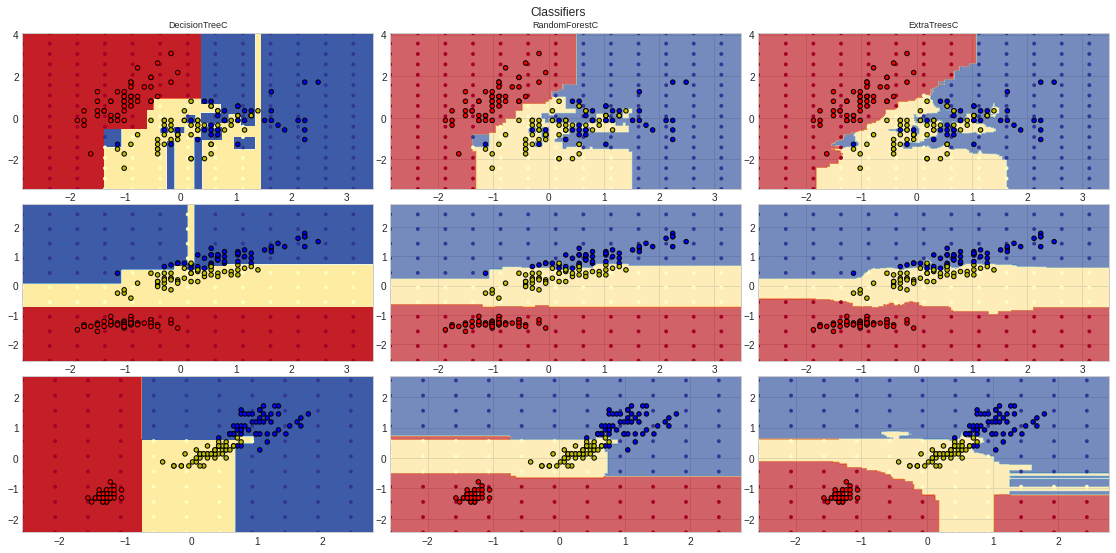

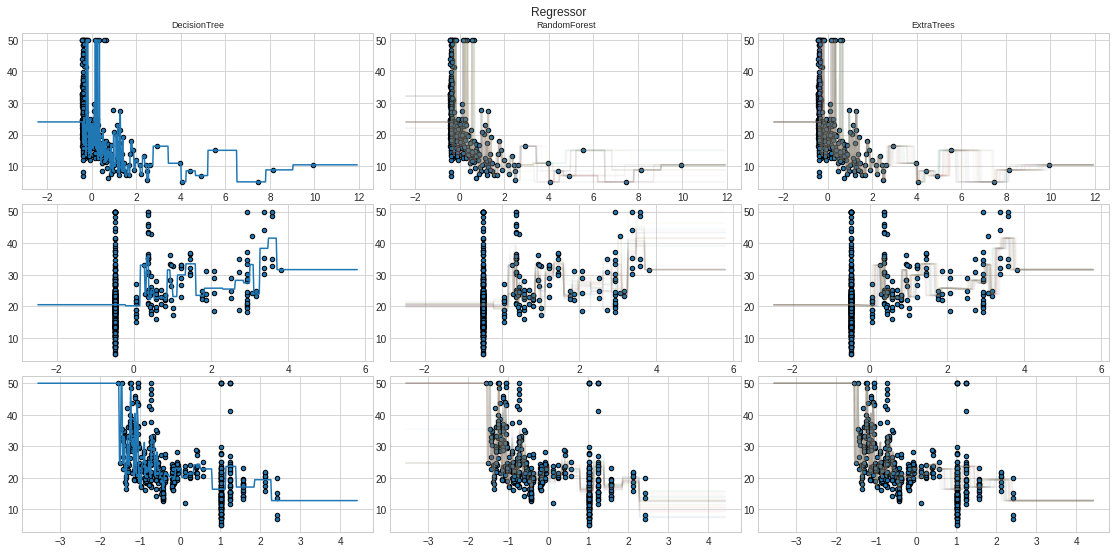

## AdaBoost

* 대표적인 부스팅 알고리즘
* 일련의 약한 모델들을 학습
* 수정된 버전의 데이터를 반복 학습 (가중치가 적용된)
* 가중치 투표(또는 합)을 통해 각 모델의 예측 값을 결합
* 첫 단계에서는 원본 데이터를 학습하고 연속적인 반복마다 개별 샘플에 대한 가중치가 수정되고 다시 모델이 학습
  * 잘못 예측된 샘플은 가중치 증가, 올바르게 예측된 샘플은 가중치 감소
  * 각각의 약한 모델들은 예측하기 어려운 샘플에 집중하게 됨

![AdaBoost](https://scikit-learn.org/stable/_images/sphx_glr_plot_adaboost_hastie_10_2_0011.png)

### AdaBoost 분류

avg fit time: 0.06470780372619629 (+/- 0.0024589582450077756)
avg score time: 0.006348896026611328 (+/- 0.00020403328768472522)
avg test score: 0.9466666666666667 (+/- 0.03399346342395189)


avg fit time: 0.07434139251708985 (+/- 0.004355340981360118)
avg score time: 0.006343555450439453 (+/- 0.00011292540898904448)
avg test score: 0.8085714285714285 (+/- 0.16822356718459935)


avg fit time: 0.15188159942626953 (+/- 0.006063555430320384)
avg score time: 0.007553672790527344 (+/- 0.0002754285311434353)
avg test score: 0.9701133364384411 (+/- 0.019709915473893072)


### AdaBoost 회귀

avg fit time: 0.09566020965576172 (+/- 0.004728853628844173)
avg score time: 0.003963184356689453 (+/- 0.00014140038108262842)
avg test score: 0.5985744583807469 (+/- 0.20937548598257683)


avg fit time: 0.08189129829406738 (+/- 0.01646564855503315)
avg score time: 0.0039269447326660155 (+/- 0.0008019656425732309)
avg test score: 0.41312084500745616 (+/- 0.04091835944493939)


## Gradient Tree Boosting

* 임의의 차별화 가능한 손실함수로 일반화한 부스팅 알고리즘
* 웹 검색, 분류 및 회귀 등 다양한 분야에서 모두 사용 가능

### Gradient Tree Boosting 분류

avg fit time: 0.1825028419494629 (+/- 0.012155321171336445)
avg score time: 0.0009828567504882812 (+/- 5.27573717906438e-05)
avg test score: 0.96 (+/- 0.024944382578492935)


avg fit time: 0.22722344398498534 (+/- 0.006153967604831455)
avg score time: 0.000991487503051758 (+/- 4.429727374789129e-05)
avg test score: 0.9330158730158731 (+/- 0.04127777701479872)


avg fit time: 0.42472524642944337 (+/- 0.00726098838890154)
avg score time: 0.0009661197662353515 (+/- 2.5288738491641932e-05)
avg test score: 0.9596180717279925 (+/- 0.02453263202329889)


### Gradient Tree Boosting 회귀

avg fit time: 0.11993212699890136 (+/- 0.0025604519552051906)
avg score time: 0.0009928703308105468 (+/- 3.9700409139679184e-05)
avg test score: 0.6752372690883461 (+/- 0.16121836382662494)


avg fit time: 0.0954463005065918 (+/- 0.005929260406269451)
avg score time: 0.0009887218475341797 (+/- 2.1540693105770847e-05)
avg test score: 0.4029450867301339 (+/- 0.0688801507855847)


## 투표 기반 분류 (Voting Classifier)

* 서로 다른 모델들의 결과를 투표를 통해 결합
* 두가지 방법으로 투표 가능
  * 가장 많이 예측된 클래스를 정답으로 채택 (hard voting)
  * 예측된 확률의 가중치 평균 (soft voting)

Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.97 (+/- 0.02) [RandomForestClassifier]
Accuracy: 0.97 (+/- 0.02) [VotingClassifier]


Accuracy: 0.97 (+/- 0.02) [SVC]
Accuracy: 0.95 (+/- 0.03) [GaussianNB]
Accuracy: 0.95 (+/- 0.03) [RandomForestClassifier]
Accuracy: 0.96 (+/- 0.02) [VotingClassifier]


### 결정 경계 시각화

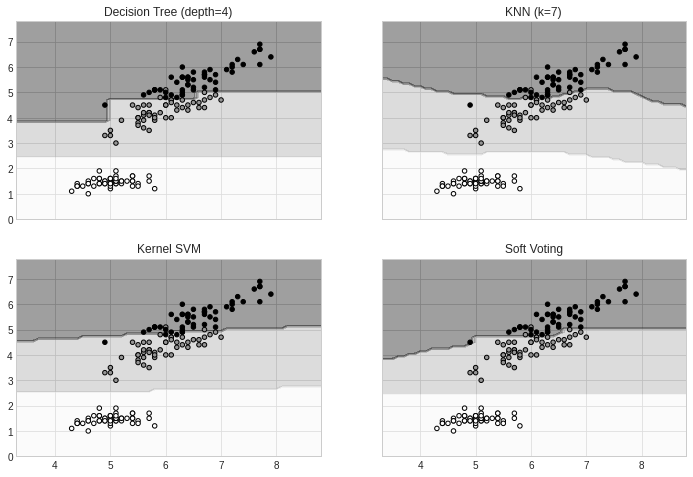

## 투표 기반 회귀 (Voting Regressor)

* 서로 다른 모델의 예측 값의 평균을 사용

R2: 0.35 (+/- 0.38) [LinearRegression]
R2: 0.67 (+/- 0.16) [GradientBoostingRegressor]
R2: 0.63 (+/- 0.21) [RandomForestRegressor]
R2: 0.66 (+/- 0.20) [VotingRegressor]


### 회귀식 시각화

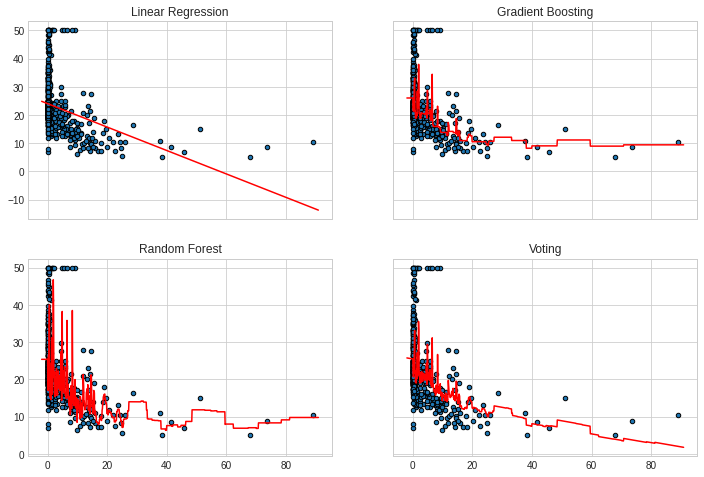

## 스택 일반화 (Stacked Generalization)

* 각 모델의 예측 값을 최종 모델의 입력으로 사용
* 모델의 편향을 줄이는데 효과적

### 스택 회귀

avg fit time: 0.14769234657287597 (+/- 0.003973230032571223)
avg score time: 0.0029734134674072265 (+/- 8.165947363439729e-05)
avg test score: 0.3193125598078287 (+/- 0.3328757426063098)


#### 회귀식 시각화

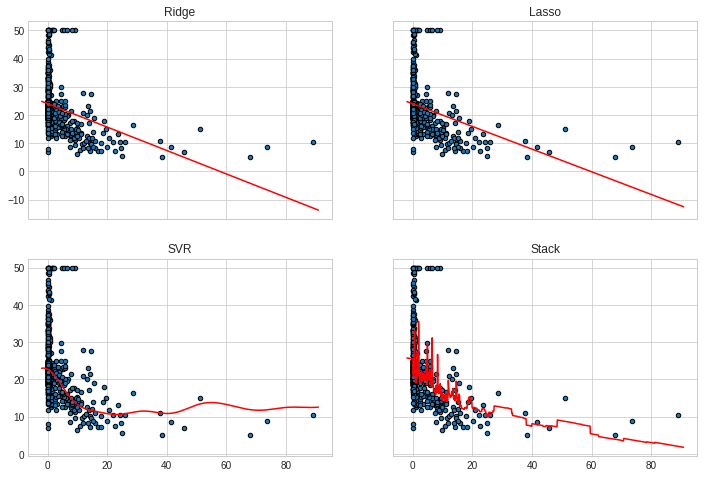

### 스택 분류

avg fit time: 0.2862356185913086 (+/- 0.007009096495986199)
avg score time: 0.008571338653564454 (+/- 0.00010991095462228061)
avg test score: 0.96 (+/- 0.024944382578492935)


#### 결정 경계 시각화

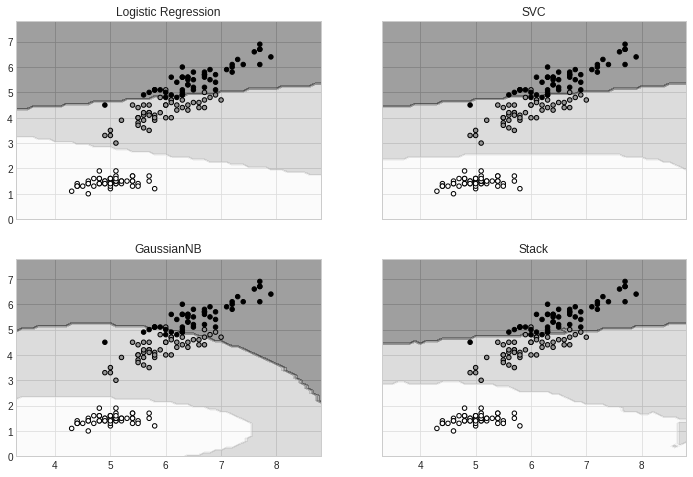